#### References

- Main Ref: https://www.kaggle.com/code/kevinnwu/singapore-green-building/notebook
- check out also: https://www.kaggle.com/code/ariohakhamanesh/energy-preprocessing-in-architecture

#### Data source
Listing of Building Energy Performance Data for Commercial from data.gov.sg: 
- by: BCA (Building and Construction Authority)
- link: https://beta.data.gov.sg/datasets/d_16e7a5921aef24f610f808b16d1480ce/view

#### About Singapore's Green Building Masterplan

The launch of the BCA Green Mark scheme in 2005 formed the backbone of Singapore’s first Green Building Masterplan, which encouraged, enabled and 
engaged industry stakeholders in adopting new green buildings. The Green Building Masterplan, which was first rolled out in 2006, has also been continually updated since its inception. The first edition targeted new buildings, to encourage developers to embed sustainability as part of a building’s life cycle from the onset. As the Built Environment sector began to embrace the idea of sustainable buildings, BCA expanded its reach to target the greening of the larger stock of existing buildings and engage building occupants to change their energy consumption behaviour. The target is to have at least 80% of buildings (by floor area) in Singapore to be green by 2030.

source: https://www1.bca.gov.sg/buildsg/sustainability/green-building-masterplans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import seaborn, and suppress warnings for now. 

import seaborn as sns

import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

### 1. Read the csv data file

In [9]:
# df = pd.read_csv('data/listing-of-building-energy-performance-data-for-commercial-buildings.csv')
df = pd.read_csv('data/listing_of_building_energy_performance_data_for_commercial_buildings.csv')

In [10]:
df.head()  #first five row of data frame.

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,NaN,NaN,Retail,No,NaN,NaN,Small,NaN,475.0,402.0,N
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y


In [11]:
df.info() #displays all of the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            783 non-null    object 
 1   buildingaddress         986 non-null    object 
 2   buildingtype            1244 non-null   object 
 3   greenmarkstatus         1244 non-null   object 
 4   greenmarkrating         306 non-null    object 
 5   greenmarkyearaward      306 non-null    float64
 6   buildingsize            1189 non-null   object 
 7   grossfloorarea          986 non-null    object 
 8   2017energyuseintensity  1224 non-null   float64
 9   2018energyusintensity   1224 non-null   float64
 10  voluntarydisclosure     1244 non-null   object 
dtypes: float64(3), object(8)
memory usage: 107.0+ KB


#### Exercise 1: Observation

Q1: from the head() command output, what data type is the `grossfloorare` column supposed to be? (numerical, int, float, string, ... ?)

Q2: from the info() command output, what data type is it recognized as?

Q3: what must you do in order to correct the error, before performing further data analysis with the dataframe? 

##### Answer: 

Q1: From the head() command output, we see that `grossfloorare` column has integer values. 

Q2: From the info() command, pandas has interpreted it's column type as object, specifically string

Q3: We will need to change the `grossfloorare` column to integer data type later.

### 2. Data Cleaning

#### Exercise 2.1: Remove Missing Data

Check to see if there are missing data in the dataframes using the `isnull()` command:

In [14]:
df.isnull().sum()  

buildingname              461
buildingaddress           258
buildingtype                0
greenmarkstatus             0
greenmarkrating           938
greenmarkyearaward        938
buildingsize               55
grossfloorarea            258
2017energyuseintensity     20
2018energyusintensity      20
voluntarydisclosure         0
dtype: int64

First, we drop row that have null values on the following columns: 

- 'buildingaddress',
- '2017energyuseintensity',
- '2018energyusintensity'


In [15]:
df = df.dropna(subset = ['buildingaddress','2017energyuseintensity','2018energyusintensity']).reset_index(drop=True)

In [16]:
# check for null again
df.isnull().sum()

buildingname              196
buildingaddress             0
buildingtype                0
greenmarkstatus             0
greenmarkrating           676
greenmarkyearaward        676
buildingsize                0
grossfloorarea              0
2017energyuseintensity      0
2018energyusintensity       0
voluntarydisclosure         0
dtype: int64

Null values still exist in two of the above columns 'greenmarkrating' and 'greenmarkyearaward'.

Display and examine the data in 'greenmarkrating' and 'greenmarkyearaward':

In [17]:
df[['greenmarkrating','greenmarkyearaward']]

,greenmarkrating,greenmarkyearaward
0,NaN,NaN
1,Platinum,2018.0
2,Platinum,2018.0
3,Platinum,2017.0
4,Gold,2015.0
...,...,...
972,NaN,NaN
973,NaN,NaN
974,Platinum,2010.0
975,Platinum,2016.0


These are cases where the 'greenmarkrating' field is null, i.e. for buildings that do not have any green mark rating. However, the corresponding `greenmarkyearawardis` field will also null (i.e. the building is not awarded greenmark award. As a result it has no green mark rating, which is as expected.)

Therefore, we shall ignore the Nulls in the two columns for now. 


#### Exercise 2.2: Correct data type for 'grossfloorarea'

Correct grossfloorarea data type by:
1. first, remove any comma from data,
2. then change the column type to `int`.


In [18]:
df.head()  

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
2,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
3,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y
4,KINEX,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail,Yes,Gold,2015.0,Large,"28,938",431.0,396.0,Y


In [19]:
df['grossfloorarea'] = df['grossfloorarea'].str.replace(',' , '').astype(int)

In [22]:
# check the result
df.dtypes

buildingname               object
buildingaddress            object
buildingtype               object
greenmarkstatus            object
greenmarkrating            object
greenmarkyearaward        float64
buildingsize               object
grossfloorarea              int64
2017energyuseintensity    float64
2018energyusintensity     float64
voluntarydisclosure        object
dtype: object

#### Exercise 2.3: Correct Other Naming Errors

Note that there are some other errors in the data and column names. 

We start by looking at the data in the 'buildingtype' column :

In [23]:
df['buildingtype'].unique()

array(['Mixed Development', 'Retail', 'Office', 'Hotel',
       'Community Hospital', 'Private Clinic', 'Polytechnic',
       'General Hospital/ Specialist Centre (Public)', 'Nursing Home',
       'Private School', 'Univerisity', 'Specialist Centre (Public)',
       'TCM Clinic', 'ITE', 'Private Hospital (Private)',
       'Private College', 'Polyclinic'], dtype=object)

Note the typo errors in one of the entries, i.e. 'Univerisity' instead of 'University'.

Correct it by completing the command below:

In [24]:
df['buildingtype'] = df['buildingtype'].apply(lambda x : 'University' if x == 'Univerisity' else x)
df['buildingtype'].unique()

array(['Mixed Development', 'Retail', 'Office', 'Hotel',
       'Community Hospital', 'Private Clinic', 'Polytechnic',
       'General Hospital/ Specialist Centre (Public)', 'Nursing Home',
       'Private School', 'University', 'Specialist Centre (Public)',
       'TCM Clinic', 'ITE', 'Private Hospital (Private)',
       'Private College', 'Polyclinic'], dtype=object)


Now check the column names in the dataframe. 

Notice that one of the column `'2018energyusintensity'` is also spelled wrongly.

Correct it as well below: 

In [25]:
df = df.rename(columns={'2018energyusintensity':'2018energyuseintensity'})
df.head()

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyuseintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,5036,81.0,105.0,Y
1,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,65640,382.0,365.0,Y
2,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,102356,212.0,183.0,Y
3,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,15769,203.0,181.0,Y
4,KINEX,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail,Yes,Gold,2015.0,Large,28938,431.0,396.0,Y


### 3. Visualization

#### Exercise 3.1: Pie Chart

Create a pie chart for normal vs green building, for total building, as shown:

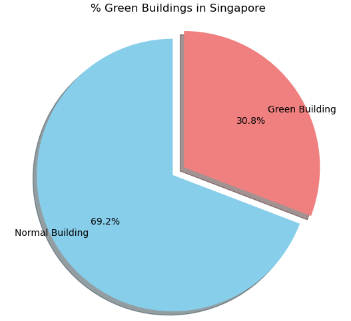


Index(['No', 'Yes'], dtype='object', name='greenmarkstatus')


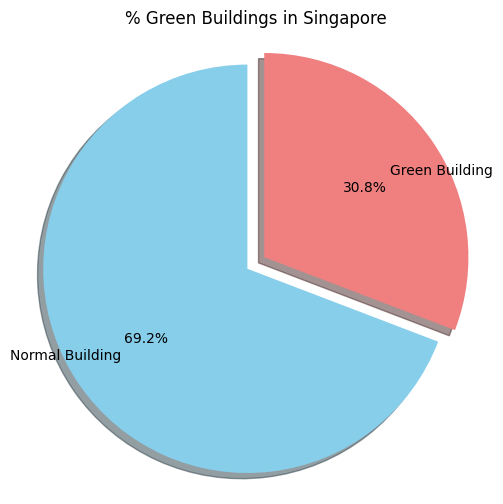

In [26]:
# First, count the occurrences of each unique value in the 'greenmarkstatus' column
value_counts = df['greenmarkstatus'].value_counts()
print(value_counts.index)

# Now, create a pie chart using value_counts
plt.figure(figsize=(6, 6))
plt.pie( value_counts , labels=('Normal Building','Green Building'), explode=(0,0.1), shadow=True,  pctdistance=0.6, labeldistance=.75, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('% Green Buildings in Singapore')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Exercise 3.2: Bar Chart (1)

Create a bar chart showing the number or distribution of buildings according to the different green mark ratings, as shown:

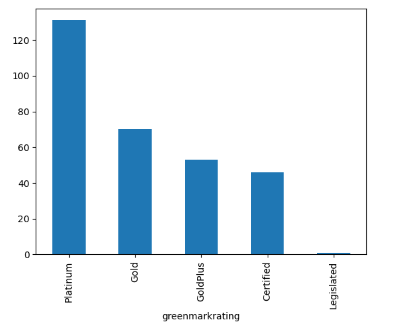

In [27]:
data3 = df.groupby('greenmarkrating').count()
data3

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyuseintensity,voluntarydisclosure
greenmarkrating,,,,,,,,,,
Certified,40,46,46,46,46,46,46,46,46,46
Gold,57,70,70,70,70,70,70,70,70,70
GoldPlus,49,53,53,53,53,53,53,53,53,53
Legislated,0,1,1,1,1,1,1,1,1,1
Platinum,112,131,131,131,131,131,131,131,131,131


<Axes: xlabel='greenmarkrating'>

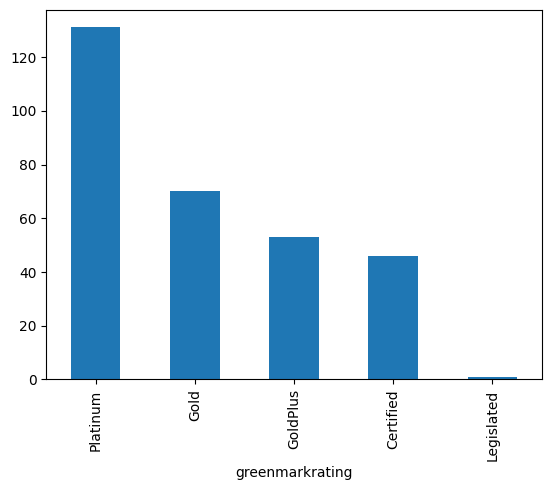

In [28]:
# sort the data
data3 = data3['greenmarkstatus'].sort_values(ascending=False)

data3.plot( kind = 'bar') 

#### Exercise 3.3: Bar Chart (2)

Create a bar chart for normal vs green buildings according to different building type, as shown:

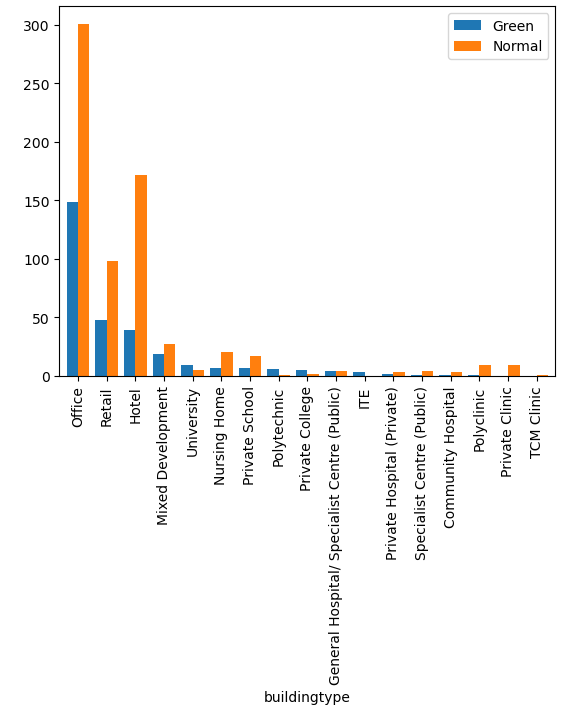

In [29]:
# First, create two separate dataframes using groupby commands:

data1 = df[df['greenmarkstatus'] == 'Yes'].groupby('buildingtype').size()
data2 = df[df['greenmarkstatus'] == 'No' ].groupby('buildingtype').size()

In [30]:
# Extract 'greenmarkstatus' columns from both data1 and data2, 
#   and combine into a single dataframe combined_df
combined_df = pd.concat([ data1, data2 ], axis=1, keys=['Green', 'Normal'])
combined_df = combined_df.fillna(0).astype(int)

In [31]:
# display the result
combined_df

,Green,Normal
buildingtype,,
Community Hospital,1,3
General Hospital/ Specialist Centre (Public),4,4
Hotel,39,172
ITE,3,0
Mixed Development,19,27
Nursing Home,7,20
Office,149,301
Polyclinic,1,9
Polytechnic,6,1


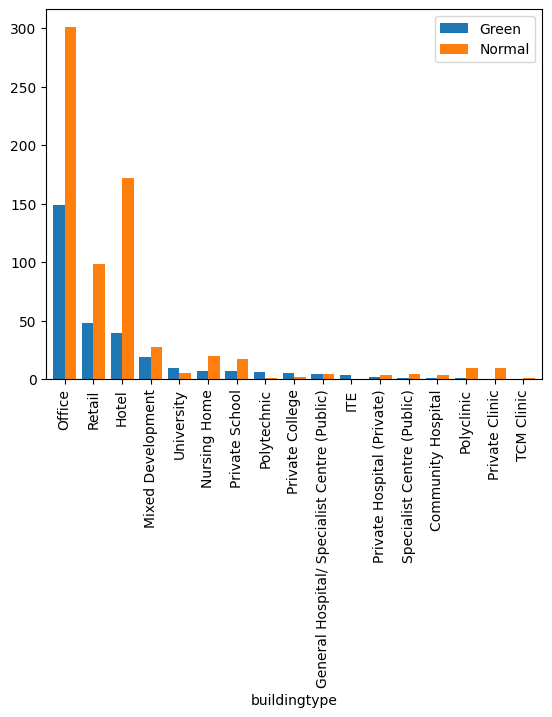

In [ ]:
# Sort the data, and then plot the bar plot 
combined_df = combined_df.sort_values('Green', ascending=False)
combined_df.plot( kind = 'bar', width = 0.8)
plt.show()

#### Questions

Q1. From the pie chart in Exercise 3.1, what percentage of buildings in Singapore are 'Green' buildings?"

Q2."From the histogra in Exercise 3.3m, what observations can you make regarding the percentage of each building type that is green"

Answers:

(Q1) 30.8% of buildings at Singapore are green building.

(Q2) (briefly explain your answer here.) The percentage of each building type that is green is low in general.


### 4. Creating Pairplot

In this exercise, we will use Pairplot to help us identify outliers (if any) in the data. 

Outlier data can distort the pairplot view and any data analysis work. If we can identify any outlier, it is better to remove it from the dataset. We may then replot the pairplot again for a better representation (not done here). 

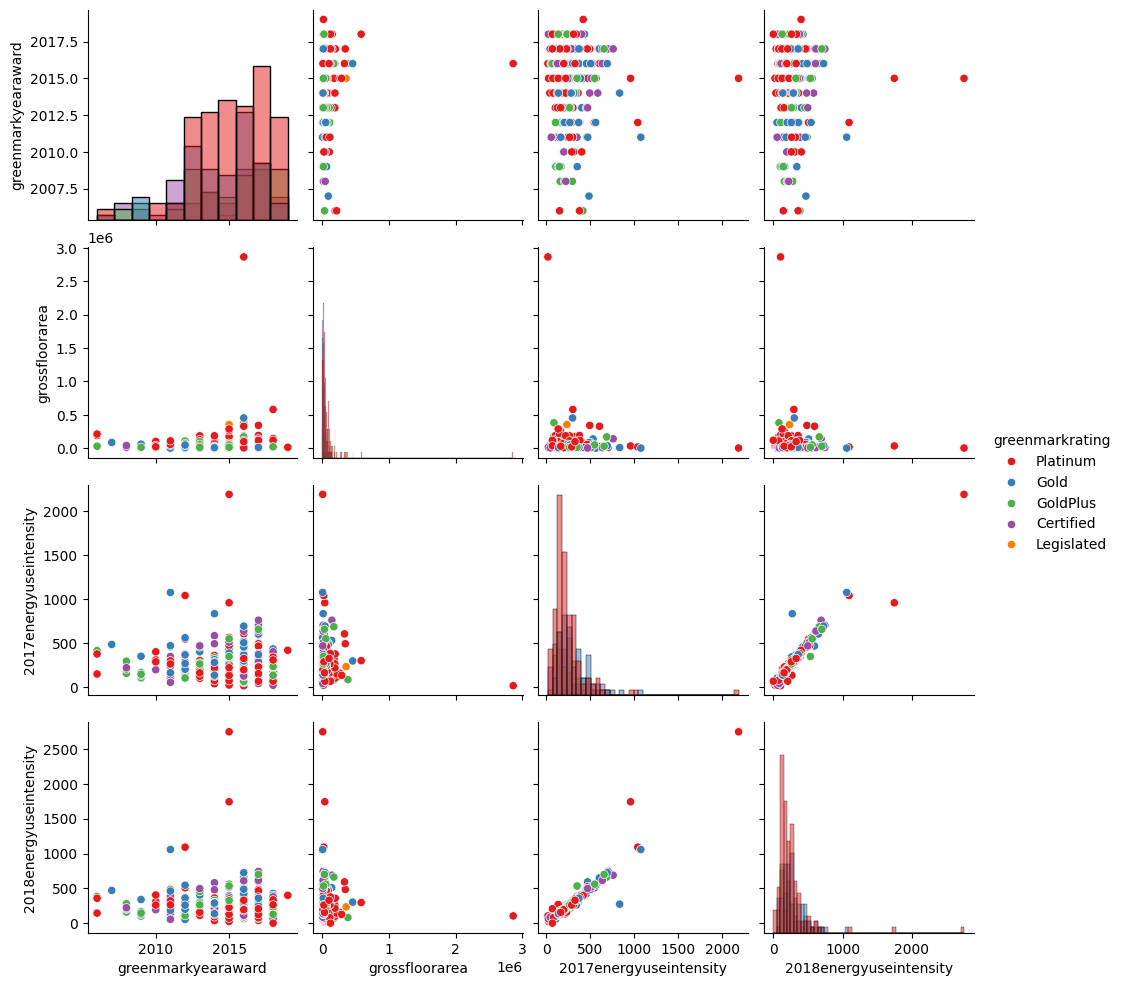

In [35]:
# Create pairplot
sns.pairplot(df, diag_kind='hist', hue='greenmarkrating', palette='Set1')
plt.show()

From the pairplot, can you detect any outlier in the dataset? 



### 5. Challenge Exercise

Going from 2017 to 2018, what is the trend in terms of (a) the number of green buildings and (b) the number of green awards ratings? 

Can you create a visualization to see the trends? 

Are the number of green buildings and number of awards increasing or decreasing ?


**You can use ChatGPT to help you with the coding.** Include the chatGPT prompt that you used to help you with your coding in your answers.

In [ ]:
import pandas as pd

# df = pd.read_csv('listing-of-building-energy-performance-data-for-commercial-buildings.csv')
df = pd.read_csv('listing_of_building_energy_performance_data_for_commercial_buildings.csv')
df.head() # Check the first few rows

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,NaN,NaN,Retail,No,NaN,NaN,Small,NaN,475.0,402.0,N
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y


In [115]:
df.dtypes

buildingname               object
buildingaddress            object
buildingtype               object
greenmarkstatus            object
greenmarkrating            object
greenmarkyearaward        float64
buildingsize               object
grossfloorarea             object
2017energyuseintensity    float64
2018energyusintensity     float64
voluntarydisclosure        object
dtype: object

In [116]:
# 2017 to 2018, what is the trend in terms of (a) the number of green buildings 

d1 = df[
    (df['greenmarkyearaward']==2017.0) |
    (df['greenmarkyearaward']==2018.0)
]

d1.head()

d1['greenmarkyearaward'] .value_counts()

greenmarkyearaward
2017.0    57
2018.0    34
Name: count, dtype: int64

#### it can be seen that the number of Green Awards has decreased from 57 in 2017 to 34 in 2018.

In [118]:
d1.groupby(['greenmarkrating','greenmarkyearaward']).size().reset_index()

,greenmarkrating,greenmarkyearaward,0
0,Certified,2017.0,9
1,Certified,2018.0,4
2,Gold,2017.0,10
3,Gold,2018.0,3
4,GoldPlus,2017.0,10
5,GoldPlus,2018.0,9
6,Platinum,2017.0,28
7,Platinum,2018.0,18


In [119]:
d2017 = d1[d1['greenmarkyearaward']==2017.0].groupby('greenmarkrating').size().reset_index().rename(columns={0:'2017'})
d2018 = d1[d1['greenmarkyearaward']==2018.0].groupby('greenmarkrating').size().reset_index().rename(columns={0:'2018'})

In [120]:
d2017

,greenmarkrating,2017
0,Certified,9
1,Gold,10
2,GoldPlus,10
3,Platinum,28


In [121]:
d2018

,greenmarkrating,2018
0,Certified,4
1,Gold,3
2,GoldPlus,9
3,Platinum,18


In [122]:
final_df = pd.concat([d2017, d2018['2018']], axis=1)
final_df

,greenmarkrating,2017,2018
0,Certified,9,4
1,Gold,10,3
2,GoldPlus,10,9
3,Platinum,28,18


In [123]:
final_df = final_df.set_index('greenmarkrating')
final_df

,2017,2018
greenmarkrating,,
Certified,9,4
Gold,10,3
GoldPlus,10,9
Platinum,28,18


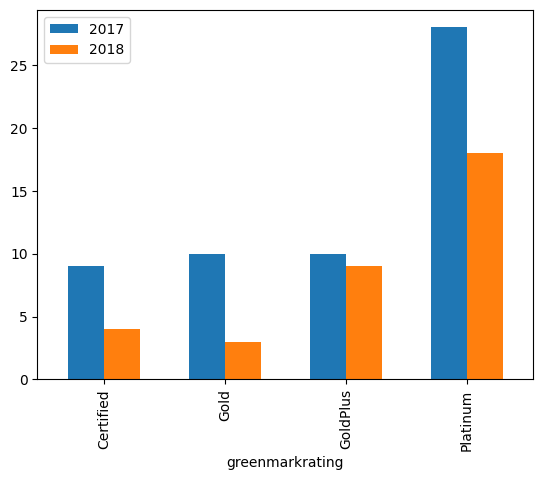

In [124]:
final_df.plot(kind='bar', width=0.6)
plt.show()

In [125]:
# 2017 to 2018, what is the trend in terms of  (b) the number of green awards ratings? 

#### it can be seen that for all green award rating categories (certified, gold, goldplus and platinum), the number of awards have decreased from 2017 to 2018